In [1]:
# import module mode
from sidermit.publictransportsystem import mode

# build a Transport mode with parameters
name = "train"
bya = 1 #boarding and alighting (take value 0 or 1)
co = 2
c1 = 2
c2 = 2
v = 20
t = 4
fmax = 50
kmax = 500
theta = 0.5
tat = 5
d = 1

train_obj = mode.TransportMode(name, bya, co, c1, c2, v, t, fmax, kmax, theta, tat, d)

# build default mode
[bus_obj, metro_obj] = mode.TransportMode.get_default_modes()

# print information
print("name: {}, fmax: {}, kmax: {}".format(train_obj.name, train_obj.fmax, train_obj.kmax))
print("name: {}, fmax: {}, kmax: {}".format(bus_obj.name, bus_obj.fmax, bus_obj.kmax))
print("name: {}, fmax: {}, kmax: {}".format(metro_obj.name, metro_obj.fmax, metro_obj.kmax))

# build a mode_manager
# in mode manager default value to add_default_mode is True
# with that list of transport mode of the mode_manager start with bus_obj and metro_obj
# in this case add_default_mode=False for that list of transport mode is empty
mode_manager = mode.TransportModeManager(add_default_mode=False)

# add mode_obj
mode_manager.add_mode(bus_obj)
mode_manager.add_mode(metro_obj)
mode_manager.add_mode(train_obj)

# get all modes
modes_obj = mode_manager.get_modes()
print("numbers of modes created: {}".format(len(modes_obj)))

# delete a mode_obj
mode_manager.delete_mode("metro")
modes_obj = mode_manager.get_modes()
print("numbers of modes created: {}".format(len(modes_obj)))

# list of names
names_modes_obj = mode_manager.get_modes_names()
print("modes_obj name: {}".format(names_modes_obj))

# update a mode
# only give value parameters to update. Names of parameters to change: bya, co, c1, c2, v, t, fmax, kmax, theta, tat, d
mode_manager.update_mode("train", fmax=1000)

# get only a mode
train_obj = mode_manager.get_mode("train")
print("name: {}, fmax: {}, kmax: {}".format(train_obj.name, train_obj.fmax, train_obj.kmax))


name: train, fmax: 50, kmax: 500
name: bus, fmax: 150, kmax: 160
name: metro, fmax: 40, kmax: 1440
numbers of modes created: 3
numbers of modes created: 2
modes_obj name: ['bus', 'train']
name: train, fmax: 1000, kmax: 500


In [2]:
# import module passenger
from sidermit.publictransportsystem import passenger

# build a passenger with parameters
va = 6
pv = 1
pw = 2
pa = 3
pt = 4
spv = 1
spw = 2
spa = 3
spt = 4

passenger_obj = passenger.Passenger(va, pv, pw, pa, pt, spv, spw, spa, spt)

print("v: {}".format(passenger_obj.va))

# build default passenger
passenger_obj = passenger.Passenger.get_default_passenger()

print("v: {}".format(passenger_obj.va))


v: 6
v: 4.0


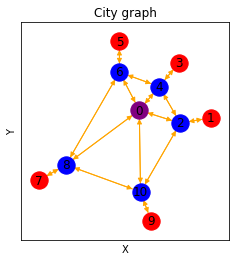

In [4]:
# import module network
from sidermit.publictransportsystem import network
# import module graph
from sidermit.city import graph

# symetric parameters graph city
n=5 
L=1000
g=0.5
P=2

# asymetric parameters graph city
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290]
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with asimmetryc parameters
graph_obj = graph.Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# build a network without routes
network_obj = network.TransportNetwork(graph_obj)

network_obj.plot("sidermit.png")

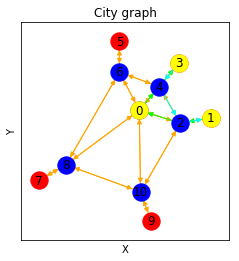

In [5]:
# build a custom route
route_id = "custom_route"
mode_obj = mode.TransportMode("custom_mode", 0, 1, 1, 2, 30, 2, 30, 400, 1, 0, 1)
# string with node_id sequences
nodes_sequence_i = "1,2,0,4,3"
nodes_sequence_r = "3,4,2,1"
# string with node_id sequences
stops_sequence_i = "1,0,3"
stops_sequence_r = "3,1"
# custom route
custom_route = network.Route(route_id, mode_obj, nodes_sequence_i, nodes_sequence_r, stops_sequence_i, stops_sequence_r)

# add route 
network_obj.add_route(custom_route)

network_obj.plot("sidermit.png")

In [6]:
# get predefined routes

# get default modes_obj
[bus_obj, metro_obj] = mode.TransportMode.get_default_modes()

# predefined routes
feeder_route = network_obj.get_feeder_routes(mode_obj=bus_obj)
circular_route = network_obj.get_circular_routes(mode_obj=metro_obj)
radial_route = network_obj.get_radial_routes(mode_obj=metro_obj, short=False, express=False)
diametral_route = network_obj.get_diametral_routes(mode_obj=bus_obj, jump=3, short=False, express=False)
tangencial_route = network_obj.get_tangencial_routes(mode_obj=bus_obj, jump=4, short=False, express=False)

# get information of the routes
print("feeder routes: {}".format(len(feeder_route)))
print("circular routes: {}".format(len(circular_route)))
print("radial routes: {}".format(len(radial_route)))
print("diametral routes: {}".format(len(diametral_route)))
print("tangencial routes: {}".format(len(tangencial_route)))

print()
for route in tangencial_route:
    print("route_id: {}, mode_name: {}, node_sequence_i: {}, stop_sequence_i: {}, node_sequence_r: {}, stop_sequence_r: {}".format(route.id, route.mode.name, route.nodes_sequence_i, route.stops_sequence_i, route.nodes_sequence_r, route.stops_sequence_r))

# add diametral and circular routes to network_obj
for route in diametral_route:
    network_obj.add_route(route)
for route in circular_route:
    network_obj.add_route(route)

# get all routes in network:obj
routes = network_obj.get_routes()

print()
print("numbers of routes in network: {}".format(len(routes)))

# print routes_id in network
print()
print("routes_id created")
for route in routes:
    print(route.id)
        
# delete a route_id

network_obj.delete_route("custom_route")

routes = network_obj.get_routes()

print()
print("numbers of routes in network: {}".format(len(routes)))

feeder routes: 5
circular routes: 2
radial routes: 5
diametral routes: 5
tangencial routes: 5

route_id: T4_bus_1, mode_name: bus, node_sequence_i: ['1', '2', '4', '6', '8', '10', '9'], stop_sequence_i: ['1', '2', '4', '6', '8', '10', '9'], node_sequence_r: ['9', '10', '8', '6', '4', '2', '1'], stop_sequence_r: ['9', '10', '8', '6', '4', '2', '1']
route_id: T4_bus_2, mode_name: bus, node_sequence_i: ['3', '4', '6', '8', '10', '2', '1'], stop_sequence_i: ['3', '4', '6', '8', '10', '2', '1'], node_sequence_r: ['1', '2', '10', '8', '6', '4', '3'], stop_sequence_r: ['1', '2', '10', '8', '6', '4', '3']
route_id: T4_bus_3, mode_name: bus, node_sequence_i: ['5', '6', '8', '10', '2', '4', '3'], stop_sequence_i: ['5', '6', '8', '10', '2', '4', '3'], node_sequence_r: ['3', '4', '2', '10', '8', '6', '5'], stop_sequence_r: ['3', '4', '2', '10', '8', '6', '5']
route_id: T4_bus_4, mode_name: bus, node_sequence_i: ['7', '8', '10', '2', '4', '6', '5'], stop_sequence_i: ['7', '8', '10', '2', '4', '6', 

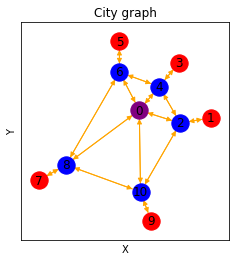

In [7]:
# print only city graph
network_obj.plot("sidermit.png", list_routes=[])

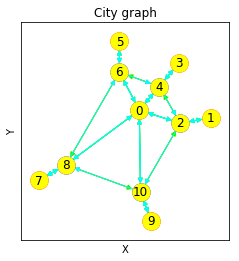

In [8]:
# print all routes and city graph
network_obj.plot("sidermit.png")

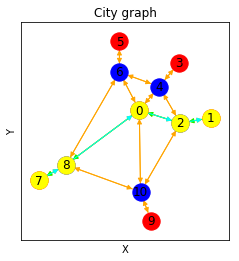

In [9]:
# print only a route and city graph
network_obj.plot("sidermit.png", list_routes=["D3_bus_1"])